# Sequential Ensembles: Boosting
Continuamos nossas aulas de técnicas de *machine learning* para classificação. Na aula passada falamos sobre métodos de Ensembles Paralelos. Nesta aula, vamos falar sobre métodos de Ensembles sequenciais. Lembrando os tipos de Ensembles:


1. ***Parallel Ensemble Methods***: métodos de conjunto paralelo em que os *base learners* são gerados em paralelo (exemplos são os métodos de *Bagging, Stacking, Voting*). A motivação básica dos métodos paralelos é explorar a independência entre os *base learners*, pois o erro pode ser reduzido drasticamente pela média.


2. ***Sequential Ensemble Methods***: métodos de conjunto sequencial em que os *base learners* são gerados sequencialmente (exemplos são os métidos de *Boosting*). A motivação básica dos métodos seqüenciais é explorar a dependência entre os *base learners*. O desempenho geral pode ser aprimorado pesando exemplos previamente rotulados incorretamente com maior peso.


Dentro desta classificação temos:


1. Parallel Ensemble Methods

    - Voting Ensemble
    - Stacking Ensemble
    - Bagging Ensemble
    
    

2. Sequential Ensemble Methods

    - Boosting Ensemble

_________________

# Definição de Sequential Boosting Ensemble



Boosting traz um conceito popular de combinar vários modelos fracos para obter um modelo forte.
O modo como o modelo se baseia em erros sequencialmente é exclusivo para cada algoritmo de boosting.

*Boosting* envolve treinar iterativamente os *weak learners*, cada um tentando corrigir o erro cometido pelo modelo anterior. Isso é obtido treinando um modelo fraco em todos os dados de treinamento e construindo um segundo modelo que visa corrigir os erros cometidos pelo primeiro modelo. Em seguida, construímos um terceiro modelo que tenta corrigir os erros cometidos pelo segundo modelo e assim por diante. Os modelos são adicionados iterativamente até o modelo final corrigir todos os erros cometidos por todos os modelos anteriores.

Quando os modelos são adicionados em cada estágio, alguns pesos são atribuídos ao modelo, o que está relacionado à precisão do modelo anterior. Após a adição de um classificador fraco, os pesos são reajustados. Os pontos classificados incorretamente recebem pesos mais altos e os pontos classificados corretamente recebem pesos menores. Essa abordagem fará com que o próximo classificador se concentre nos erros cometidos pelo modelo anterior.

O aumento reduz o erro de generalização, adotando um modelo de alta e baixa variância e reduzindo a tendência em um nível significativo. Lembre-se, *Bagging* reduz a variação. Semelhante ao *Bagging*, o reforço também permite trabalhar com os modelos de classificação e regressão. Dê uma olhada nos diagramas abaixo para entender intuitivamente como o *Boosting* funciona em cada um dos estágios. O diagrama abaixo mostra os diferentes estágios de um algoritmo de aumento.


Vamos entender o diagrama acima. Temos um conjunto de dados D, a primeira coisa que faremos no estágio 0 é treinar um modelo em todo o conjunto de dados. O modelo pode ser uma classificação ou um modelo de regressão. Vamos nomear esse modelo como $M_0$. Vamos assumir que este modelo $M_0$ está tentando ajustar uma função $h_0 (x)$. Então, a função de previsão para este modelo é dada por $y_pred = h_0 (x)$. 

O modelo 0 foi projetado para ter um alto viés. Geralmente, o reforço é aplicado para um modelo de alto viés e baixa variação. O alto viés em um modelo refere-se basicamente a um alto erro de treinamento. O alto viés surge principalmente devido a algumas suposições incorretas feitas na fase de treinamento.

Agora, após a construção do primeiro modelo, obteremos, no estágio 0, o erro de previsão para cada ponto de dados criado pelo modelo $M_0$. Portanto, o erro na previsão para qualquer rótulo de classe é dado por $y-y_pred$. Lembre-se, existem muitas funções de erro por aí - por exemplo, o erro quadrático, o *hinge loss error*, o erro de perda logística etc. Mas, por simplicidade, vamos nos concentrar no erro de diferença simples para este exemplo.

Agora que fizemos essas coisas no estágio 0, o que faremos no estágio 1 é o seguinte. Tentarei ajustar um modelo $M_1$ aos erros produzidos pelo modelo no estágio 0. Lembre-se, $M_1$ não está treinando nos rótulos de classe reais. $M_1$ está treinando os erros que obtivemos no final do estágio 0. Digamos que obtemos uma função $h_1 (x)$, que treinou os erros gerados pelo modelo $M_0$. Assim, no final do estágio 1, meu modelo final será realmente a soma ponderada das duas funções de previsão anteriores (como mostrado no diagrama). Atribuiremos os pesos $a_0$ e $a_1$ a $h_0 (x)$ e $h_1 (x)$ respectivamente. Portanto, no final do estágio 1, o modelo se parece com: 

$$ F_1 (x) = a_0 * h_0 (x) + a_1 * h_1 (x) $$

em que a_0 e a_1 são pesos atribuídos às funções de previsão. Lembre-se de que os pesos sempre serão maiores para funções com alto erro de classificação incorreta. Dessa forma, podemos criar o próximo modelo na sequência para focar mais nos erros cometidos pelo modelo anterior.

Da mesma forma, o modelo no final do estágio 2 terá a função 

$$ F_2 (x) = a_0 * h_0 (x) + a_1 * h_1 (x) + a_2 * h_2 (x) $$

Assim, no final de todas as etapas, o modelo final que temos é dado pela soma de $a_i * h_x (i)$, onde o valor de i varia de 1 a N. Assim, intuitivamente, estamos na verdade reduzindo o erro de treinamento, o que significa em outras palavras, na verdade estamos reduzindo o viés de um modelo.




<img src="https://miro.medium.com/max/1000/1*VGSoqefx3Rz5Pws6qpLwOQ@2x.png" width=700>

# Adaboost 

AdaBoost, abreviação de Adaptive Boosting, foi criado por Yoav Freund e Robert Schapire. É um dos primeiros algoritmos de sucesso no ramo Boosting do aprendizado de máquina.
AdaBoost é um algoritmo popular e excelente para começar ao aprender sobre o mundo do boost.
Uma coisa a notar é que AdaBoost realmente funciona com qualquer classificador, como regressão logística, SVMs, etc., desde que sejam modelos fracos. No entanto, AdaBoost é notoriamente discutido no contexto de árvores de decisão de profundidade única chamadas “*stumps*”. 
Existem algumas razões para isso, mas isso está fora do escopo da aula de hoje.
A questão é que o AdaBoost não precisa necessariamente ser usado junto com as árvores de decisão, mas normalmente é feito na prática, devido às vantagens das *stumps* em relação a
outros alunos fracos.

## O  algoritmo

<img src="https://miro.medium.com/max/1400/1*9NjSsLHRSXUwl0cyvKbWGQ.png" width="40%">

Não se assuste ainda, vamos desvendar cada step desse algoritmo!

Lembrando que o Adaboost é um modelo para classificaçao e regressão. Basicamente, o algoritmo consiste de construir pequenas árvores que só possuem o nó raiz e as quais chamamos de *stumps* combinar o resultado dessas *stumps* em um único resultado. Lembrando que cada *stump* vai ter um peso diferente, baseado no quão precisa elas são.

<img src="https://miro.medium.com/max/1400/1*DVdys8z6Qobvmb0tFvm2XQ.png" width="80%">

Uma coisa importante a destacar é que o AdaBoost usa especificamente -1 ou 1 como rótulos de predição e produzirá -1 ou 1 durante a previsão. Ele não usa a abordagem binária usual de 0 e 1.
Com isso em mente, vamos mergulhar na análise.

### Inicializaaço dos pesos

<img src="https://miro.medium.com/max/1400/1*U16jWJJfhWa5QiQQhoa92g.png" width="50%">

No AdaBoost, não usamos diretamente o conjunto de dados, pois é para treinamento. Em vez disso, no início de cada iteração de treinamento, amostramos o conjunto de dados usando pesos para obter os dados de treinamento reais.
Portanto, a etapa 1 do AdaBoost é inicializar um peso de 1 / N para cada ponto de dados. Novamente, o peso de um ponto de dados representa a probabilidade de selecioná-lo durante a amostragem.
Uma ilustração disso é a seguinte:

<img src="https://miro.medium.com/max/1400/1*2DFPtONH1UpcX1tNAPaPCQ.png" width="50%">

Usaremos o conjunto de dados acima como nosso exemplo de brinquedo por um tempo.
Após a inicialização do peso, entramos no loop de iteração de treinamento na etapa 2.
Na primeira iteração (m = 1), cada ponto de dados do conjunto de dados original tem uma chance igual de ser selecionado como uma amostra de treinamento. Portanto, se nosso conjunto de dados for como o acima e tiver 10 pontos de dados, cada um terá uma probabilidade de 0,1 de ser selecionado.

<img src="https://miro.medium.com/max/1000/1*JMm1dNDD6BwkktZXOvYeSQ.png" width="50%">

### Weak Learners

<img src="https://miro.medium.com/max/1400/1*US8fXwA7fRgcbdO0zOIbXA.png" width="50%">


Depois de amostrar o conjunto de dados para obter seu conjunto de treinamento para a iteração atual, um classificador fraco K_m é então treinado usando este conjunto de treinamento. Em nosso caso, K_m é apenas um toco de árvore de decisão.

### Update dos Pesos

Os *stumps* no AdaBoost aprendem progressivamente com os erros dos *stumps* anteriores, ajustando os pesos do conjunto de dados para acomodar os erros cometidos pelos *stumps* em cada iteração. Os pesos dos dados classificados incorretamente serão aumentados e os pesos dos dados classificados corretamente serão reduzidos. Como resultado, à medida que avançamos em iterações adicionais, os dados de treinamento incluirão principalmente dados que muitas vezes são classificados incorretamente por nossos *stumps*.

Por exemplo:

<img src="https://miro.medium.com/max/732/1*WdnVQz9fm9qqdkQXVCQJyA.png" width="30%">

Se nosso primeiro "stump* classificou incorretamente as amostras de dados 0,8,5,4, então, no final da iteração 1, as atualizações de peso resultam nessas amostras de dados tendo pesos maiores.
Após as atualizações de peso, você pode ver no exemplo abaixo que a nova amostragem do conjunto de dados para obter o conjunto de treino para a iteração 2 resultaria na inclusão de mais amostras de dados classificadas incorretamente (0,8,5,4).

<img src="https://miro.medium.com/max/1762/1*lJKXXIj9_yBOpB8bDb4NWA.png" width="70%">

>OBS: Os updates do exemplo são somente para ilustração do processo, representando os acréscimos e decréscimos.


Intuitivamente, isso faz sentido: se um toco não é capaz de classificar certos dados corretamente, então você só precisa treinar mais tocos nos dados que são “difíceis de classificar”. Portanto, tomando uma soma ponderada desses tocos, vamos AdaBoost ter um desempenho muito bom.
Como resultado, as atualizações de peso são cruciais para que o AdaBoost funcione corretamente.

Mas como realizar o update adequado dos pesos?

A resposta está nesta seção do algoritmo AdaBoost:

<img src="https://miro.medium.com/max/1400/1*S9Ohe2OcOpDZKWrAelTFLQ.png" width="50%">

A etapa 2e) do algoritmo AdaBoost praticamente resume como as atualizações de peso em determinada iteração m são feitas, elas são calculadas como o produto dos pesos atuais, com o exponencial de (-alpha * y * K_m (x)), onde:

- **y** representa o valor real do target
- **K_m(x**) é a previsão feita pela *stump* gerada na iteração m
- **alpha_m** É a *confiança* que nós temos no poder preditivo da *stump*
- **y** and **K_m(x)** podem ser ou -1 ou 1. Se y for 1 and K_m(x) for 1, ou ambos forem -1, isso significa que o registro foi corretamente classificado. Então, o produto y*K_m(x) será igual a 1. Caso contrário, quando a previsão for diferente do valor real, essa multiplicação será negativa.

Quando os dados são classificados incorretamente, y * K_m (x) = -1, então a atualização do peso será positiva e os pesos aumentarão exponencialmente para esses dados. Quando os dados são classificados corretamente, y * K_m (x) = 1, ocorre o oposto.


No final a combinaçao de pesos e previsões da origem a Cm(x):

<img src="https://miro.medium.com/max/782/1*eCFwnJcHfqwDuYw9xAawig.png" width="40%">

### A predição

Agora que entendemos matemática e intuitivamente o que alfa representa, tudo o que resta é ver a etapa final do algoritmo AdaBoost, que é fazer previsões gerais sobre novos dados.


<img src="https://miro.medium.com/max/1400/1*lnQ-KvTdG6VFGiP9Ax_yZw.png" width="40%">

Isso significa apenas que vamos pegar o sinal da soma ponderada.
Afinal, AdaBoost prevê apenas {-1,1}, então, desde que a soma ponderada esteja acima de 0, então AdaBoost irá prever 1. O oposto acontece, quando a soma ponderada está abaixo de 0 e AdaBoost irá prever -1.

## Hiperparâmetros

Hiper-Parâmetros:


- `base_estimator` 
    - Ajuda a especificar o tipo de estimador de base, ou seja, o algoritmo de aprendizado de máquina a ser usado como aluno de base.


- `n_estimators`
    - Ele define o número de estimadores de base. 
    - O valor padrão é 10, mas você deve manter um valor mais alto para obter melhor desempenho.


- `learning_rate`
    - Este parâmetro controla a contribuição dos estimadores na combinação final.
    - Há uma trade-off entre learning_rate e n_estimators.
   
- `random_state`
    - Um valor inteiro para especificar a divisão de dados aleatórios.
    - Um valor definido de random_state sempre produzirá os mesmos resultados se fornecido com os mesmos parâmetros e dados de treinamento.



# Demonstração de Boosting para Classificadores


1) Primeiramente, criamos um classificador base. Ele vai conter erros, e precisamos corrigí-los


2) Criamos um segundo classificador, mas que opera em cima dos erros do primeiro (wrong predictions).


3) Continuamos esse loop até chegar na performance desejada. O output final é dado pela Weighted Average dos sub-modelos


4) Nosso modelo final é uma combinação de todos os outros

Algoritmos baseados em boosting:
 - Adaboost
 - GBM (Gradient Boosting Machine)
 - XGBoost (Extreme Gradient Boost)
 - LightGBM
 - CatBoost

_______________

# Gradient Boosting (GBM)


O *Gradient Boosting* ou GBM é outro algoritmo de aprendizado de máquina de conjunto que funciona para problemas de regressão e classificação. O GBM usa a técnica de *boosting*, combinando vários *weak learnenrs* para formar um *strong learner*. Árvores de regressão usadas como *base learner*, cada árvore subsequente em série é construída com base nos erros calculados pela árvore anterior.

Usaremos um exemplo simples para entender o algoritmo GBM. Temos que prever a idade de um grupo de pessoas usando os dados abaixo:




1. Um valor médio é assumido como o valor previsto para todas as observações no conjunto de dados.

2. Os erros são calculados usando esta previsão média e os valores reais.

3. Um modelo de árvore é criado usando os erros calculados acima como variável de destino. Nosso objetivo é encontrar a melhor divisão para minimizar o erro.

4. As previsões desse modelo são combinadas com as previsões 1.

5. Este valor calculado acima é a nova previsão.

6. Novos erros são calculados usando esse valor previsto e o valor real.

7. As etapas 2 a 6 são repetidas até que o número máximo de iterações seja atingido (ou a função de erro não seja alterada).



Lembra quando estudamos regressão linear?

Uma das premissas para que fosse um modelo válido e produzisse o melhor estimador possível era de que nossos resíduos tivessem média zero e sua soma também fosse zero.

<img src="https://miro.medium.com/max/1400/1*mBStjWVK-yLvPvGYjw-1dA.png" width=500>

Agora pense nesses resíduos como erros cometidos por nosso modelo preditor. Embora os modelos baseados em árvore (considerando a árvore de decisão como modelos básicos para o nosso aumento de gradiente aqui) não sejam baseados em tais suposições, mas se pensarmos logicamente (não estatisticamente) sobre esta suposição, podemos argumentar que, se formos capazes de ver algum padrão de resíduos em torno de 0, podemos alavancar esse padrão para ajustar um modelo.

No final, nossa previsão é = Modelo + Resíduos. 

Portanto, a intuição que rege o modelo de gradiente boosting é a de entender os padrões de erros gerados e então utilizá-los para fortalecer as previsões fracas dos modelos anteriores. Assim que atingirmos um estágio em que os resíduos não tenham nenhum padrão que possa ser modelado, podemos parar de modelar os resíduos (caso contrário, isso pode levar a um sobreajuste). Algoritmicamente, estamos minimizando nossa função de perda, de forma que a perda do teste atinja seus mínimos.

Vamos considerar o seguinte conjunto de dados:
<img src="https://miro.medium.com/max/1172/1*7EPVSm_80fyh-29g8q6yRQ.png" width=400>

1) Podemos escolher um modelo simples (alto bias) para tentar modelar esses dados. O output desse modelo seria Y_predicted_1.

2) Calculamos os erros (resíduos) das previsões desse primeiro modelo. [E1 = Y_real - Y_predicted_1]

3) Construímos um segundo modelo, cujas features são as mesmas do primeiro modelo, porém o target é o vetor de resíduos calculado no passo anterior. O output disso chamos de E1_predicted, que será a estimativa dos resíduos do primeiro modelo.

4) Aqui, poderíamos tentar realizar previsões do tipo: Y_predicted_2 = Y_predicted_1 + E1_predicted.

Poderíamos parar por aqui, mas podemos continuar adicionando modelos e ajustando erros até que tudo isso vire uma grande combinação de previsões e resíduos.

5) Ajuste outro modelo nos resíduos que ainda restam. ou seja, [E2 = Y - Y_predicted_2] e repetimos as etapas 2 a 5 até que comece a overfitar ou a soma dos resíduos se torne constante. O overfitting pode ser controlado verificando consistentemente a precisão dos dados de validação.

Trazendo uma intuição visual:

<img src="https://miro.medium.com/max/1400/1*2fGb3jTF85XyHtnpJYA8ug.png" width=400>

<img src="https://miro.medium.com/max/1284/1*Ram0yHpCwXWZ23HZUN1QwA.png" width=400>


Observamos que após a 20ª iteração, os resíduos são distribuídos aleatoriamente  em torno de 0 e nossas previsões estão muito próximas dos valores verdadeiros. (as iterações são chamadas de n_estimators na implementação do sklearn). Esse seria um bom ponto para parar ou nosso modelo começará a se ajustar a mais.
Vamos ver como fica nosso modelo para a 50ª iteração.

<img src="https://miro.medium.com/max/1400/1*tNYXUUU23kcoiww26Uh6jw.png" width=400>

Vemos que mesmo após a 50ª iteração, os resíduos vs. gráfico x parecem semelhantes ao que vemos na 20ª iteração. Mas o modelo está se tornando mais complexo e as previsões estão se ajustando demais aos dados de treinamento e estão tentando aprender cada dado de treinamento. Portanto, teria sido melhor parar na 20ª iteração.

## XGBoost

O XGBoost (Extreme Gradient Boosting) é uma implementação avançada do algoritmo de *Gradient Boosting*. O XGBoost provou ser um algoritmo ML altamente eficaz, amplamente utilizado em competições de aprendizado de máquina e hackathons. O XGBoost possui alto poder preditivo e é quase 10 vezes mais rápido que as outras técnicas de *Gradient Boosting*. Ele também inclui uma variedade de regularização que reduz o excesso de ajuste e melhora o desempenho geral. Por isso, também é conhecida como técnica de "reforço regularizado".

Vamos ver como o XGBoost é comparativamente melhor do que outras técnicas:

1. Regularização:
    - A implementação padrão do GBM não tem regularização como o XGBoost.
    - Assim, o XGBoost também ajuda a reduzir o excesso de ajustes.
    
    
2. Processamento paralelo:
    - O XGBoost implementa o processamento paralelo e é mais rápido que o GBM.
    - O XGBoost também suporta a implementação no Hadoop.


3. Alta flexibilidade:
    - O XGBoost permite que os usuários definam objetivos de otimização personalizados e critérios de avaliação, adicionando uma nova dimensão ao modelo.
    - Tratamento de valores ausentes:
    - O XGBoost possui uma rotina integrada para lidar com os valores ausentes.


4. Poda de árvores:
    - O XGBoost faz divisões até o max_depth especificado e, em seguida, começa a podar a árvore para trás e remove as divisões além das quais não há ganho positivo.


5. Validação cruzada incorporada:
    - O XGBoost permite que o usuário execute uma validação cruzada a cada iteração do processo de otimização e, portanto, é fácil obter o número ideal exato de iterações de otimização em uma única execução.




## LGBM - Light GBM

Antes de discutir como o Light GBM funciona, primeiro vamos entender por que precisamos desse algoritmo quando temos tantos outros (como os que vimos acima). O Light GBM supera todos os outros algoritmos quando o conjunto de dados é extremamente grande. Comparado aos outros algoritmos, o Light GBM leva menos tempo para executar em um enorme conjunto de dados.

O LightGBM é uma estrutura de aumento de gradiente que usa algoritmos baseados em árvore e segue a abordagem em folha, enquanto outros algoritmos trabalham em um padrão de abordagem em nível. As imagens abaixo ajudarão você a entender a diferença de uma maneira melhor.


O crescimento em folha pode causar excesso de ajuste em conjuntos de dados menores, mas isso pode ser evitado usando o parâmetro "max_depth" para aprender. Você pode ler mais sobre o Light GBM e sua comparação com o XGB neste artigo [Which algorithm takes the crown: Light GBM vs XGBOOST?](https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/)




Hiper-Parâmetros:


- `num_iterations`
    - Ele define o número de iterações de reforço a serem executadas.


- `num_leaves`
    - Este parâmetro é usado para definir o número de folhas a serem formadas em uma árvore.
    - No caso do Light GBM, como a divisão ocorre em folhas em vez de em profundidade, num_leaves deve ser menor que 2 ^ (max_depth), caso contrário, pode levar ao sobreajuste.


- `min_data_in_leaf`
    - Um valor muito pequeno pode causar super ajuste.
    - É também um dos parâmetros mais importantes para lidar com o super ajuste.


- `max_depth`
    - Ele especifica a profundidade ou o nível máximo até o qual uma árvore pode crescer.
    - Um valor muito alto para esse parâmetro pode causar super ajuste.
    
    
- `bagging_fraction`
    - É usado para especificar a fração de dados a ser usada para cada iteração.
    - Este parâmetro é geralmente usado para acelerar o treinamento.


- `max_bin`
    - Define o número máximo de posições em que os valores dos recursos serão agrupados.
    - Um valor menor de max_bin pode economizar muito tempo, pois agrupa os valores dos recursos em compartimentos discretos, o que é computacionalmente barato.

# CatBoost


O tratamento de variáveis categóricas é um processo tedioso, especialmente quando você tem um grande número dessas variáveis. Quando suas variáveis categóricas têm muitos rótulos (ou seja, são altamente cardinais), a execução de uma codificação *one-hot-encoding* exponencialmente aumenta a dimensionalidade e torna-se realmente difícil trabalhar com o conjunto de dados.


O CatBoost pode lidar automaticamente com variáveis categóricas e não requer amplo pré-processamento de dados, como outros algoritmos de aprendizado de máquina. Para mais informações acesse [CatBoost: A machine learning library to handle categorical (CAT) data automatically](https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/)


Hiper-Parâmetros


- `loss_function`
    - Define a métrica a ser usada para o treinamento.


- `iterations`
    - O número máximo de árvores que podem ser construídas.
    - O número final de árvores pode ser menor ou igual a esse número
    
    
- `learning_rate`
    - Define a taxa de aprendizado.
    - Usado para reduzir a etapa do gradiente.


- `border_count`
    - Especifica o número de divisões para recursos numéricos.
    - É semelhante ao parâmetro max_bin.
    
    
- `depth`
    - Define a profundidade das árvores.


- `random_seed`
    - Este parâmetro é semelhante ao parâmetro 'random_state' que vimos anteriormente.
    - É um valor inteiro para definir a semente aleatória para treinamento.
 

*Ensembles* pode aumentar exponencialmente o desempenho do seu modelo e às vezes pode ser o fator decisivo entre o primeiro e o segundo lugar! Abordamos várias técnicas de *Ensembles* e vimos como essas técnicas são aplicadas em algoritmos de aprendizado de máquina. 



----------

# Hyperparametrization

Precisamos tomar alguns cuidados com GBM

- Eles têm um grande número de hiperparâmetros - aqueles que podem criar ou quebrar seu modelo.


- E ainda por cima, ao contrário da Floresta Aleatória, suas configurações padrão geralmente não são as ideais!


Portanto, se você deseja usar os GBMs para modelar seus dados, acredito que seja necessário obter um entendimento de alto nível do que acontece internamente. Você não pode fugir usando-o como uma caixa preta completa.

 Para entender como parametrizar os algoritmos de **Boosting** acesse [Getting started with Gradient Boosting Machines — using XGBoost and LightGBM parameters](https://towardsdatascience.com/understanding-gradient-boosting-machines-using-xgboost-and-lightgbm-parameters-3af1f9db9700)
 



# Prática Guiada

In [55]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, validation_curve
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt

In [10]:
df=data('cancer').dropna()


In [12]:
X=df.drop('status', axis=1)
y=df['status']

## Adaboost

Para ajustar os hiperparâmetros, há várias coisas que precisamos fazer. Primeiro, precisamos iniciar nosso AdaBoostClassifier com algumas configurações básicas. Em seguida, precisamos criar nossa grade de pesquisa com os hiperparâmetros. Existem dois hiperparâmetros que iremos definir e eles são o número de estimadores (n_estimators) e a taxa de aprendizagem.


Decision Tree


Faremos uma árvore de decisão apenas para fins de comparação. Primeiro, definiremos os parâmetros para a validação cruzada. Em seguida, usaremos um loop for para executar várias árvores de decisão diferentes. A diferença nas árvores de decisão será sua profundidade. A profundidade é o quão longe a árvore pode ir para purificar a classificação. Quanto mais profundidade, maior a probabilidade de sua árvore de decisão overfitar os dados. A última coisa que faremos é imprimir os resultados. 

In [63]:
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)



In [69]:
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(random_state=123), X, y, "max_depth",
                                               range (1,10),
                                               cv=skf)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass param_name=max_depth, param_range=range(1, 10) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [70]:
train_scores

array([[0.72      , 0.72      , 0.72      , 0.72      , 0.72      ,
        0.72      , 0.72      , 0.71523179, 0.71523179, 0.71523179],
       [0.74666667, 0.76666667, 0.75333333, 0.74666667, 0.74666667,
        0.74666667, 0.72      , 0.74834437, 0.74172185, 0.74834437],
       [0.74666667, 0.79333333, 0.79333333, 0.76      , 0.78      ,
        0.78      , 0.74      , 0.78145695, 0.74834437, 0.78145695],
       [0.83333333, 0.84      , 0.8       , 0.83333333, 0.79333333,
        0.78      , 0.77333333, 0.79470199, 0.8013245 , 0.78145695],
       [0.86      , 0.84      , 0.86      , 0.9       , 0.81333333,
        0.78      , 0.83333333, 0.83443709, 0.83443709, 0.83443709],
       [0.88666667, 0.85333333, 0.92666667, 0.93333333, 0.85333333,
        0.86      , 0.87333333, 0.86754967, 0.87417219, 0.89403974],
       [0.91333333, 0.88666667, 0.95333333, 0.94666667, 0.9       ,
        0.90666667, 0.89333333, 0.91390728, 0.8807947 , 0.9205298 ],
       [0.92666667, 0.92      , 0.9866666

In [71]:
valid_scores

array([[0.70588235, 0.70588235, 0.70588235, 0.70588235, 0.70588235,
        0.70588235, 0.70588235, 0.75      , 0.75      , 0.75      ],
       [0.70588235, 0.52941176, 0.64705882, 0.76470588, 0.70588235,
        0.70588235, 0.70588235, 0.625     , 0.75      , 0.6875    ],
       [0.70588235, 0.47058824, 0.70588235, 0.70588235, 0.70588235,
        0.70588235, 0.76470588, 0.625     , 0.75      , 0.6875    ],
       [0.64705882, 0.47058824, 0.70588235, 0.76470588, 0.64705882,
        0.70588235, 0.76470588, 0.5625    , 0.875     , 0.6875    ],
       [0.58823529, 0.47058824, 0.70588235, 0.82352941, 0.70588235,
        0.76470588, 0.58823529, 0.625     , 0.75      , 0.5625    ],
       [0.64705882, 0.47058824, 0.70588235, 0.82352941, 0.64705882,
        0.70588235, 0.58823529, 0.5625    , 0.8125    , 0.625     ],
       [0.64705882, 0.47058824, 0.70588235, 0.70588235, 0.52941176,
        0.64705882, 0.64705882, 0.5       , 0.75      , 0.6875    ],
       [0.70588235, 0.52941176, 0.7058823

In [72]:
train_scores_mean = train_scores.mean(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)

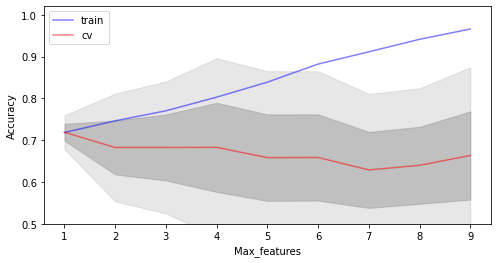

In [73]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(range(1,10), train_scores_mean, alpha=0.5, color='blue', label='train')
ax.plot(range(1,10), valid_scores_mean, alpha=0.5, color='red', label='cv')
ax.fill_between(range(1,10), valid_scores_mean - valid_scores.std(axis=1), 
                valid_scores_mean + valid_scores.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(range(1,10), valid_scores_mean - 2*valid_scores.std(axis=1), 
                valid_scores_mean + 2*valid_scores.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.5,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features");

In [43]:
ada=AdaBoostClassifier(random_state=13)
ada_grid={'n_estimators':[50,500, 1000,2000],
             'learning_rate':[.001,0.01,.1]}
ada_grid=GridSearchCV(estimator=ada,param_grid=search_grid,
                    scoring='accuracy',n_jobs=-1,cv=skf, verbose=1)

In [44]:
ada_grid.fit(X,y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   22.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostClassifier(random_state=13), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [50, 500, 1000, 2000]},
             scoring='accuracy', verbose=1)

In [45]:
ada_grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 2000}

In [49]:
cv_results = pd.DataFrame(ada_grid.cv_results_).sort_values(by='rank_test_score', ascending=True)

In [52]:
ada_grid.best_score_

0.7363970588235295

In [50]:
cv_results



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
7,3.881378,0.050930,0.454367,0.009783,0.01,2000,"{'learning_rate': 0.01, 'n_estimators': 2000}",0.823529,0.529412,0.705882,0.764706,0.882353,0.705882,0.764706,0.6250,0.8750,0.6875,0.736397,0.104506,1
9,0.986507,0.019699,0.113775,0.003254,0.1,500,"{'learning_rate': 0.1, 'n_estimators': 500}",0.882353,0.529412,0.705882,0.823529,0.941176,0.705882,0.764706,0.5000,0.8125,0.6875,0.735294,0.134309,2
6,1.911132,0.010392,0.221859,0.005514,0.01,1000,"{'learning_rate': 0.01, 'n_estimators': 1000}",0.823529,0.529412,0.705882,0.764706,0.823529,0.705882,0.705882,0.6875,0.8750,0.6875,0.730882,0.092364,3
8,0.100461,0.000834,0.013566,0.000342,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",0.823529,0.529412,0.705882,0.823529,0.764706,0.647059,0.705882,0.6875,0.8750,0.6875,0.725000,0.095585,4
5,0.972429,0.027690,0.112789,0.003476,0.01,500,"{'learning_rate': 0.01, 'n_estimators': 500}",0.823529,0.529412,0.705882,0.823529,0.823529,0.647059,0.705882,0.6250,0.8750,0.6875,0.724632,0.103966,5
0,0.095650,0.002531,0.012156,0.001543,0.001,50,"{'learning_rate': 0.001, 'n_estimators': 50}",0.705882,0.705882,0.705882,0.705882,0.705882,0.705882,0.705882,0.7500,0.7500,0.7500,0.719118,0.020217,6
11,3.714099,0.126137,0.337135,0.059719,0.1,2000,"{'learning_rate': 0.1, 'n_estimators': 2000}",0.764706,0.529412,0.588235,0.823529,0.882353,0.705882,0.823529,0.5625,0.7500,0.6875,0.711765,0.113914,7
10,1.972197,0.026887,0.241909,0.010134,0.1,1000,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.882353,0.529412,0.588235,0.823529,0.882353,0.647059,0.823529,0.5000,0.7500,0.6875,0.711397,0.135195,8
3,3.767167,0.059106,0.435757,0.012740,0.001,2000,"{'learning_rate': 0.001, 'n_estimators': 2000}",0.764706,0.529412,0.705882,0.764706,0.705882,0.705882,0.705882,0.6250,0.8750,0.6875,0.706985,0.085750,9
1,0.933389,0.034175,0.092933,0.001820,0.001,500,"{'learning_rate': 0.001, 'n_estimators': 500}",0.764706,0.529412,0.705882,0.705882,0.705882,0.705882,0.705882,0.7500,0.7500,0.6875,0.701103,0.062132,10


## Gradient Boosting Machines 

In [59]:
parameters_gbm = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 5),
    "min_samples_leaf": np.linspace(0.1, 0.5, 5),
    "max_depth":[3,5,8, 12],
    "n_estimators":[10, 30, 70, 100, 500, 1000, 2000]
    }


In [61]:
gbm = GradientBoostingClassifier(random_state=1)
gbm_grid = GridSearchCV(gbm, parameters_gbm, cv=skf, n_jobs=-1, verbose=1)
gbm_grid.fit(X, y)

Fitting 10 folds for each of 2800 candidates, totalling 28000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 1836 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2498 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 3436 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 4302 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 5396 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 6446 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 7668 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 9158 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 10508 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 11958 tasks     

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 12],
                         'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'n_estimators': [10, 30, 70, 100, 500, 1000, 2000]},
             verbose=1)

In [62]:
gbm_grid.best_score_

0.7551470588235294